# Capsicum Germplasm Database

In [101]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from matplotlib.pyplot import imshow
from matplotlib.image import imread
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
%qtconsole

In [53]:
df = pd.read_csv("../data/capsicum_ml_600.csv")
df_full = pd.read_csv("../data/capsicum_full_600.csv")

In [58]:
print(len(df))
df.head()

600


,id,url,plant_id,latin_name,phytophthora root rot,plant habit,anther color,blossom end shape,calyx margin,corolla color,...,corolla spots,flower angle,percent dry weight,beet curly top virus,alfalfa mosaic virus,dwarfism,bacterial leaf spot,cucumber mosiac virus,phytophthora,verticillium wilt
0,1010454,https://npgsweb.ars-grin.gov/gringlobal/access...,Grif 972,Capsicum annuum L.,8.0,5.0,3.0,9.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1010461,https://npgsweb.ars-grin.gov/gringlobal/access...,Grif 973,Capsicum annuum L.,9.0,5.0,3.0,9.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1010468,https://npgsweb.ars-grin.gov/gringlobal/access...,PI 631126,Capsicum annuum L.,7.0,7.0,NaN,7.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1010480,https://npgsweb.ars-grin.gov/gringlobal/access...,PI 631127,Capsicum annuum L.,9.0,5.0,3.0,9.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1012450,https://npgsweb.ars-grin.gov/gringlobal/access...,PI 631128,Capsicum annuum L.,9.0,9.0,NaN,1.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Features

In [65]:
#for c in df.columns:
    #print(df[c].head())
xs = []
ys = []

#for limit in [200, 500, 1000, 1500, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800]:
for limit in range(100,600,10):
    popular_columns = []

    for c in df.columns:
        valid_plants = df[c].dropna() 
        plant_count = valid_plants.shape[0]
        #print(f"{c:35} {count}")
        if plant_count > limit:
            popular_columns.append(c)

    trimmed_df = df[popular_columns].dropna(0)
    x, y = trimmed_df.shape
    xs.append(x)
    ys.append(y)

    #valid_values = df[c][df[c] != np.nan]

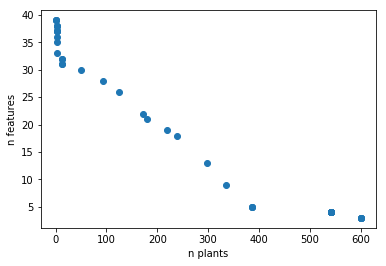

In [66]:
fig, ax = plt.subplots()
ax.scatter(xs,ys)
ax.set_xlabel("n plants")
ax.set_ylabel("n features")
plt.show()

In [75]:
## Do it all again, but for a specific limit...

limit = 350

popular_columns = []

for c in df.columns:
    valid_plants = df[c].dropna() 
    plant_count = valid_plants.shape[0]
    #print(f"{c:35} {count}")
    if plant_count > limit:
        popular_columns.append(c)

trimmed_df = df[popular_columns].dropna(0)
print(trimmed_df.shape)

(335, 9)


In [76]:
labeled_data = trimmed_df['latin_name']
print(labeled_data.head())
print()
print("--- UNIQUE LABELS ---")
print("\n".join(labeled_data.unique()))
print()
feature_data = trimmed_df.drop(['url', 'plant_id', 'latin_name'], axis=1)
print(feature_data.head())

0    Capsicum annuum L.
1    Capsicum annuum L.
2    Capsicum annuum L.
3    Capsicum annuum L.
4    Capsicum annuum L.
Name: latin_name, dtype: object

--- UNIQUE LABELS ---
Capsicum annuum L.
Capsicum frutescens L.
Capsicum chinense Jacq.
Capsicum spp.
Capsicum annuum L. var. glabriusculum (Dunal) Heiser & Pickersgill
Capsicum baccatum L. var. pendulum (Willd.) Eshbaugh
Capsicum baccatum L.
Capsicum pubescens Ruiz & Pav.

        id  filament color  fruit corkiness  leaf texture  mature fruit color  \
0  1010454             1.0              0.0           1.0                 2.0   
1  1010461             1.0              0.0           1.0                 2.0   
2  1010468             1.0              2.0           1.0                 2.0   
3  1010480             1.0              0.0           1.0                 2.0   
4  1012450             1.0              2.0           1.0                 2.0   

   seed color  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4    

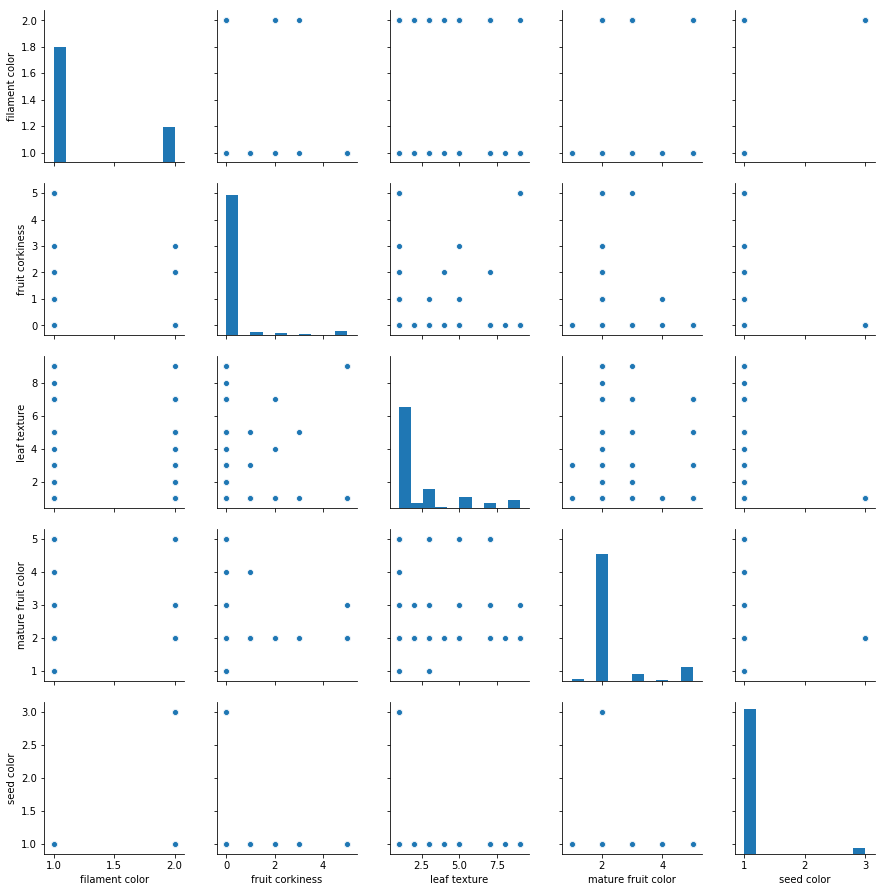

In [94]:
pp_data = feature_data.reset_index(drop=True).drop('id', 1)
sns.pairplot(pp_data, hue=None, diag_kind='hist')

In [104]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_
np.array([ 1,  0,  0,  1,  1, -1])
clustering 
DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

In [106]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=2).fit(feature_data)
print(clustering.labels_)
print(clustering)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1  2  2 -1 -1 -1 -1 -1  3  3 -1 -1 -1 -1 -1 -1
 -1 -1  4  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  5  5  6  6 -1 -1 -1 -1 -1  7  7 -1 -1 -1 -1 -1 -1
 -1 -1 -1  8  8  9  9 -1 -1 -1 -1 -1 -1 10 10 -1 -1 -1 11 11 12 12 -1 -1
 13 13 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 14 14 -1 -1 -1 -1 15 15 -1 -1 -1 -1 -1 16 16 -1
 17 17 18 18 -1 19 19 -1 -1 -1 -1 -1 20 20 21 21 22 22 -1 -1 -1 -1 -1 -1
 -1 23 23 -1 -1 -1 -1 -1 24 24 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 25 25 -1 -1
 26 26 -1 -1 -1 27 27 28 28 -1 -1 -1 -1 -1 29 29 -1 -1 -1 -1 -1 30 30 -1
 -1 -1 31 31 32 32 -1 -1 33 33 -1 34 34 -1 -1 -1 -1 -1 -1 -1 35 35 -1 -1
 -1 -1 -1 -1 -1 -1 36 36 -1 -1 -1 37 37 -1 -1 -1 38 38 39 39 40 40 -1 41
 41 42 42 -1 -1 -1 -1 -1 43 43 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 44 44 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [110]:
A = pd.DataFrame(clustering.labels_)
B = pd.DataFrame(clustering.fit_predict(feature_data))

A.